# Simulation of Resolution Function for ARCS Single Crystal Silicon Dataset

Instrument: ARCS
* Ei=100meV
* Fermi chopper: 600 Hz
* T0: 120Hz

Sample: resolution sample
* hkl: -16/3.,-8/3.,8/3.
* E: 40

## Step 0. some goodies

In [1]:
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

In [2]:
# where am I?
import os
PWD=os.path.abspath(".")
print PWD
# It should be the directory where this jupyter notebook is

/SNS/users/p63/mcvine/research/resolution/notebooks


## Step 1. Create dir structure

In [3]:
# Create a working directory for the simulation
# Change the following line to your own directory!!!
# This directory should not exist yet. It will be created later.
workdir = "/SNS/users/p63/mcvine/research/resolution/resolution-tutorial-v1"

In [5]:
# Prepare sample description.
# It will be used to generate files for the simulation
# and will be used in reduction and analysis

In [4]:
%%file Si.yml
name: Si
chemical_formula: Si2
lattice: 
 constants: 5.490700041, 5.490700041, 5.490700041, 90, 90, 90
 basis_vectors:
  - 5.490700041, 0, 0
  - 0, 5.490700041, 0
  - 0, 0, 5.490700041
 primitive_basis_vectors:
  - 0.0, 2.71526503565, 2.71526503565
  - 2.71526503565, 0.0, 2.71526503565
  - 2.71526503565, 2.71526503565, 0.0
excitations:
  - type: deltafunction
    hkl: -16/3.,-8/3.,8/3.
    E: 40.
    dE: 0.5
orientation:
 u: -1, 1, -1
 v: 2, 1, -1
shape: hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch"
temperature: 100*K

Overwriting Si.yml


In [7]:
# let mcvine workflow scaffolding helps you build the simulation directory

In [5]:
!mcvine workflow singlecrystal --outdir={workdir} --type=DGS \
    --instrument=ARCS --sample=Si.yml

/SNS/users/lj7/software/miniconda2/envs/mcvine-1.1.0.08082016/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /SNS/users/lj7/software/miniconda2/envs/mcvine-1.1.0.08082016.
  warnings.warn(msg)


In [6]:
# change to local working directory
%cd {workdir}

/SNS/users/p63/mcvine/research/resolution/resolution-tutorial-v1


In [7]:
# list dir contents
!ls .

beam  README.md  sampleassembly  scattering


In [8]:
# move sample yml file here
!mv {PWD}/Si.yml .

In [9]:
!ls .

beam  README.md  sampleassembly  scattering  Si.yml


## Step 2. Setup beam simulation

In [13]:
# In this example we won't simulate a new beam but will reuse an existing beam
# First remove the beam dir
# !!! Be very careful with rm -rf !!!
!rm -rf beam
# Then make a symlink
!ln -s ../beam beam

In [14]:
ls -l {workdir}

total 8
lrwxrwxrwx 1 p63 users   7 Aug  8 15:20 beam -> ../beam/
-rw-r--r-- 1 p63 users  73 Aug  8 07:10 README.md
drwxr-xr-x 2 p63 users  83 Aug  8 15:17 sampleassembly/
drwxr-xr-x 4 p63 users  47 Aug  8 07:35 scattering/
-rw-r--r-- 1 p63 users 553 Aug  8 15:17 Si.yml


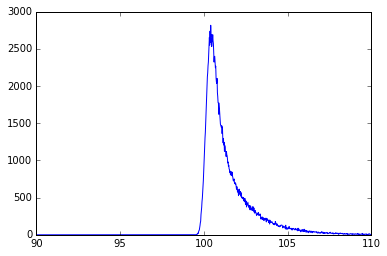

In [15]:
# check beam energy profile
import histogram.hdf as hh
ie = hh.load("beam/out/ienergy.h5")
plt.plot(ie.energy, ie.I)

## Step 3. Check and update sample assembly

In [16]:
%cd {workdir}

/SNS/users/p63/mcvine/research/resolution/resolution-tutorial-v1


In [20]:
#!cat {workdir}/sampleassembly/sampleassembly.xml

In [21]:
#!cat {workdir}/sampleassembly/Si.xyz

In [22]:
#!cat {workdir}/sampleassembly/Si-scatterer.xml

In [ ]:
# Change kernel weights

In [17]:
%%file {workdir}/sampleassembly/Si-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">


    <!-- a simple kernel for elastic scattering. more realistic kernel exists. -->
    <!--E_Q_Kernel 
	E_Q="1" 
	S_Q="1"
	Qmin="0./angstrom"
	Qmax="16./angstrom"
    weight=".05"
	/> -->


    <!-- delta function kernel for resolution calculation
      Q: Q vector
      E: energy transfer (unit: meV)
      dE: allowed deviation of energy transfer (unit: meV)
      orientation: flattened rotation matrix M. M dot Q_crystal = Q_instrument
     -->
    <ConstantvQEKernel
        momentum-transfer="-6.1031055035,-3.05155275175,3.05155275175"
        energy-transfer="40.0*meV"
        dE="0.1*meV"
        orientation="0.816496580928,0.408248290464,-0.408248290464,0.0,-0.707106781187,-0.707106781187,-0.57735026919,0.57735026919,-0.57735026919"
        weight="1.0"
        />

    
  </KernelContainer>
  
</homogeneous_scatterer>

Overwriting /SNS/users/p63/mcvine/research/resolution/resolution-tutorial-v1/sampleassembly/Si-scatterer.xml


In [18]:
ls -l

total 8
lrwxrwxrwx 1 p63 users   7 Aug  8 15:20 beam -> ../beam/
-rw-r--r-- 1 p63 users  73 Aug  8 07:10 README.md
drwxr-xr-x 2 p63 users  83 Aug  8 15:23 sampleassembly/
drwxr-xr-x 4 p63 users  47 Aug  8 07:35 scattering/
-rw-r--r-- 1 p63 users 553 Aug  8 15:17 Si.yml


In [19]:
ls -l sampleassembly/

total 12
-rw-r--r-- 1 p63 users  720 Aug  8 15:17 sampleassembly.xml
-rw-r--r-- 1 p63 users 1060 Aug  8 15:24 Si-scatterer.xml
-rw-r--r-- 1 p63 users  116 Aug  8 15:17 Si.xyz


## Step 4. Scattering sim

In [20]:
%cd "{workdir}/scattering"

/SNS/users/p63/mcvine/research/resolution/resolution-tutorial-v1/scattering


In [21]:
ls .

scripts/  template/


In [22]:
# configuration for the simulation deployment

In [22]:
%%file sim.yml

cluster:
  nodes: 16
instrument:
  name: arcs
scatter:
  ncount: 1e7
  multiple_scattering: off
  template: ./template

Writing sim.yml


In [23]:
# find the psi angle
!mcvine workflow sxu solve_psi {workdir}/Si.yml --Ei=100 \
    --hkl -5.333333333 -2.666666667 2.666666667 \
    --E 40 --psimin -5. --psimax 90 2> /dev/null

46.3746789211


In [25]:
# run simulation for one angle to verify it is working

In [24]:
psi0 = 46.3746789211

In [ ]:
! ./scripts/sim.py --angles="arange({psi0}-2,{psi0}+2.1,0.5)" > log.sim

## Step 5. Reduction

In [34]:
%cd "{workdir}/scattering"

/SNS/users/lj7/simulations/ARCS/Si/08042016/resolution-tutorial/scattering


First we reduce event-mode nexus data for each angle using Mantid

In [30]:
# reduce tof events to E events
!time mcvine workflow sxr reduce --type batch \
    --eaxis -5 75 0.5 --psi-axis 44.3746789211 48.4746789211 0.5 --eiguess 100 \
    --eventnxs work_%s/sim_%s.nxs --out reduced_%s.nxs\
    > log.reduce

/SNS/users/lj7/software/miniconda2/envs/mcvine-1.1.0.08082016/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /SNS/users/lj7/software/miniconda2/envs/mcvine-1.1.0.08082016.
  warnings.warn(msg)
/SNS/users/lj7/software/miniconda2/envs/mcvine-1.1.0.08082016/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/SNS/users/lj7/software/miniconda2/envs/mcvine-1.1.0.08082016/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *

real	15m47.346s
user	44m59.768s
sys	78m46.427s


In [38]:
# create configuration file for getting a slice

In [77]:
%%file slice_111.yml
Eaxis:
 min: 0
 max: 75
 N: 376
Q_projections:
 U:
  proj: -1,1,-1
  proj_name: -H,H,-H
  min: -6
  max: 6
  N: 481
 V:
  proj: 1,.5,-.5
  proj_name: H,0.5H,-0.5H
  min: -5.45
  max: -5.15
  N: 1
 W:
  proj: 0,-1,-1
  proj_name: 0,-K,-K
  min: -0.3
  max: 0.3
  N: 1

Overwriting slice_111.yml


In [78]:
!time mcvine workflow sxr slice \
    --sample {workdir}/Si.yml \
    --psi-axis 44.3746789211 48.4746789211 0.5 \
    --nxs reduced_%s.nxs \
    --slice slice_111.yml \
    --out slice_111.nxs \
    > log.slice_111

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
961.32user 639.14system 3:49.23elapsed 698%CPU (0avgtext+0avgdata 12679256maxresident)k
7927880inputs+2160outputs (0major+15217985minor)pagefaults 0swaps


In [79]:
# convert slice nexus to slice histogram
!mcvine workflow sxr slice2hist slice_111.nxs slice_111.h5

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
FrameworkManager-[Notice] Welcome to Mantid 3.7.20160804.1513
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid
DownloadInstrument-[Notice] All instrument definitions up to date
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.78 seconds


plot z in (0, 1e-06)


<IPython.core.display.Javascript object>


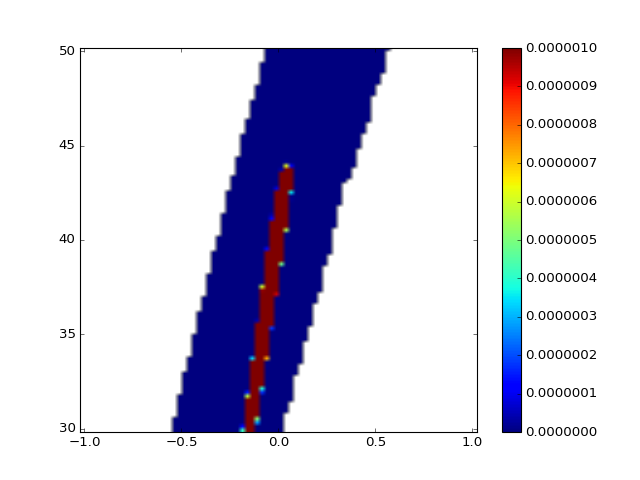

In [82]:
# plot
H.plot(hh.load("./slice_111.h5")[(-1,1),(30,50)], min=0, max=1e-6)

### Comments
This simulation has 2 degrees step size and was not run too long. Result is noisy. It was a quick simulation (~6hours). It is OK. We can run longer on different computing resources.